In [1]:
import matplotlib.pyplot as plt

from part2_proposition import conjgrad

import numpy as np

In [2]:
def kth_diag_indices(a, k):
    rows, cols = np.diag_indices_from(a)
    if k < 0:
        return rows[-k:], cols[:k]
    elif k > 0:
        return rows[:-k], cols[k:]
    else:
        return rows, cols

def build_A(n):
    A = np.zeros((n*n, n*n))
    r, c = kth_diag_indices(A, 0)
    A[r, c] = -4
    r, c = kth_diag_indices(A, 1)
    A[r, c] = 1
    r, c = kth_diag_indices(A, -1)
    A[r, c] = 1
    r, c = kth_diag_indices(A, n)
    A[r, c] = 1
    r, c = kth_diag_indices(A, -n)
    A[r, c] = 1
    for i in range(1, n):
        A[n*i, n*i-1] = 0
        A[n*i-1, n*i] = 0
    return A

print(build_A(3))

[[-4.  1.  0.  1.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  1.  0.  0.  0.  0.]
 [ 0.  1. -4.  0.  0.  1.  0.  0.  0.]
 [ 1.  0.  0. -4.  1.  0.  1.  0.  0.]
 [ 0.  1.  0.  1. -4.  1.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -4.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.  0. -4.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  1. -4.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  1. -4.]]


In [3]:
def create_image():
    N = 50
    h = 1/(N+1)
    F = np.zeros((N, N))
    F[N//2, N//2] = -1
    F = F.flatten()
    laplacien = 1/(h*h) * build_A(N)
    T = np.zeros((N*N))
    T = conjgrad(laplacien, F, T)
    T = T.reshape((N, -1))
    plt.matshow(T, cmap='jet')
    plt.show()

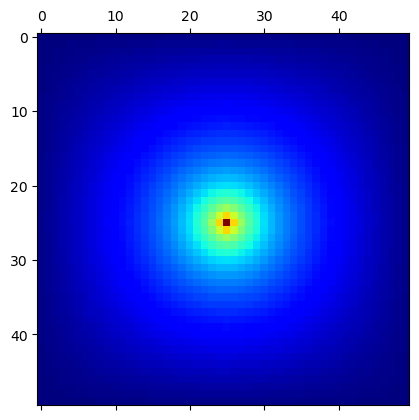

In [4]:
create_image()